<a href="https://colab.research.google.com/github/ReshmaAjil/supermarket_analysis/blob/main/Supermarket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 10 # number of transactions

data = {
    "invoice_id": [f"INV{10000+i}" for i in range(n)],
    "date": pd.date_range(start="2024-01-01", periods=n, freq="H").date,
    "time": pd.date_range(start="08:00", periods=n, freq="H").time,
    "branch": np.random.choice(["A", "B", "C"], n),
    "city": np.random.choice(["Mumbai", "Delhi", "Bangalore"], n),
    "category": np.random.choice(
        ["Groceries", "Beverages", "Snacks", "Household", "Personal Care"], n
    ),
    "product": np.random.choice(
        ["Rice", "Milk", "Soap", "Biscuits", "Juice", "Oil", "Shampoo"], n
    ),
    "unit_price": np.round(np.random.uniform(20, 500), 2),
    "quantity": np.random.randint(1, 10, n),
    "discount_pct": np.random.choice([0, 5, 10, 15, 20], n),
    "customer_type": np.random.choice(["Member", "Normal"], n),
    "gender": np.random.choice(["Male", "Female"], n),
    "payment_method": np.random.choice(["Cash", "Card", "UPI"], n),
    "rating": np.round(np.random.uniform(4, 10), 1)
}

df = pd.DataFrame(data)

# Business calculations
df["gross_sales"] = df["unit_price"] * df["quantity"]
df["net_sales"] = df["gross_sales"] * (1 - df["discount_pct"] / 100)

df.head()

/tmp/ipython-input-3317416775.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "date": pd.date_range(start="2024-01-01", periods=n, freq="H").date,
/tmp/ipython-input-3317416775.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "time": pd.date_range(start="08:00", periods=n, freq="H").time,


,invoice_id,date,time,branch,city,category,product,unit_price,quantity,discount_pct,customer_type,gender,payment_method,rating,gross_sales,net_sales
0,INV10000,2024-01-01,08:00:00,C,Bangalore,Household,Soap,115.84,7,5,Normal,Female,Card,8.4,810.88,770.336
1,INV10001,2024-01-01,09:00:00,A,Bangalore,Personal Care,Shampoo,115.84,4,15,Normal,Male,Card,8.4,463.36,393.856
2,INV10002,2024-01-01,10:00:00,C,Mumbai,Groceries,Milk,115.84,9,0,Member,Female,Cash,8.4,1042.56,1042.560
3,INV10003,2024-01-01,11:00:00,C,Bangalore,Household,Biscuits,115.84,3,15,Normal,Female,UPI,8.4,347.52,295.392
4,INV10004,2024-01-01,12:00:00,A,Delhi,Beverages,Biscuits,115.84,5,5,Member,Female,Card,8.4,579.20,550.240


In [ ]:
df.isnull().sum()
df.head()
df.shape

(10, 16)

In [ ]:
#Fix date and time
df['date']=pd.to_datetime(df['date'])
df['date']

,date
0,2024-01-01
1,2024-01-01
2,2024-01-01
3,2024-01-01
4,2024-01-01
5,2024-01-01
6,2024-01-01
7,2024-01-01
8,2024-01-01
9,2024-01-01


In [ ]:
#Feature Engineering
#profit
df['profit']=df['net_sales']*0.7
df['disc_amt']=df['gross_sales']-df['net_sales']
df['day']=df['date'].dt.day
df.head()

,invoice_id,date,time,branch,city,category,product,unit_price,quantity,discount_pct,customer_type,gender,payment_method,rating,gross_sales,net_sales,profit,disc_amt,day
0,INV10000,2024-01-01,08:00:00,C,Bangalore,Household,Soap,115.84,7,5,Normal,Female,Card,8.4,810.88,770.336,539.2352,40.544,1
1,INV10001,2024-01-01,09:00:00,A,Bangalore,Personal Care,Shampoo,115.84,4,15,Normal,Male,Card,8.4,463.36,393.856,275.6992,69.504,1
2,INV10002,2024-01-01,10:00:00,C,Mumbai,Groceries,Milk,115.84,9,0,Member,Female,Cash,8.4,1042.56,1042.560,729.7920,0.000,1
3,INV10003,2024-01-01,11:00:00,C,Bangalore,Household,Biscuits,115.84,3,15,Normal,Female,UPI,8.4,347.52,295.392,206.7744,52.128,1
4,INV10004,2024-01-01,12:00:00,A,Delhi,Beverages,Biscuits,115.84,5,5,Member,Female,Card,8.4,579.20,550.240,385.1680,28.960,1


In [ ]:
#Total sales
tot_sales=df['net_sales'].sum()
tot_sales
#total sales by category
tot_sales_by_category=df.groupby('category')['net_sales'].sum().sort_values(ascending=False)
tot_sales_by_category

,net_sales
category,
Groceries,2426.848
Household,1876.608
Snacks,770.336
Personal Care,724.000
Beverages,550.240


city
Delhi        3515.744
Bangalore    1459.584
Mumbai       1372.704
Name: net_sales, dtype: float64


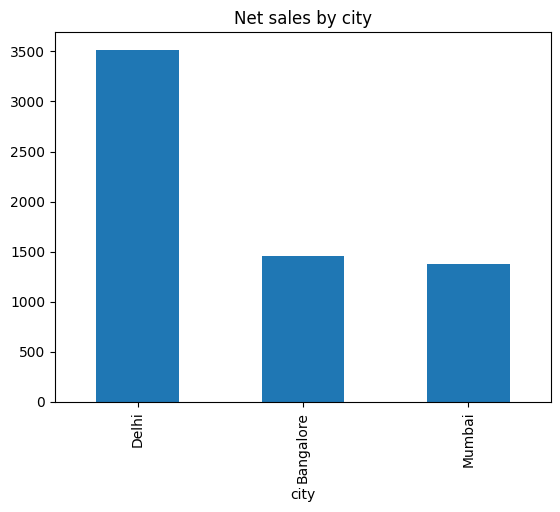

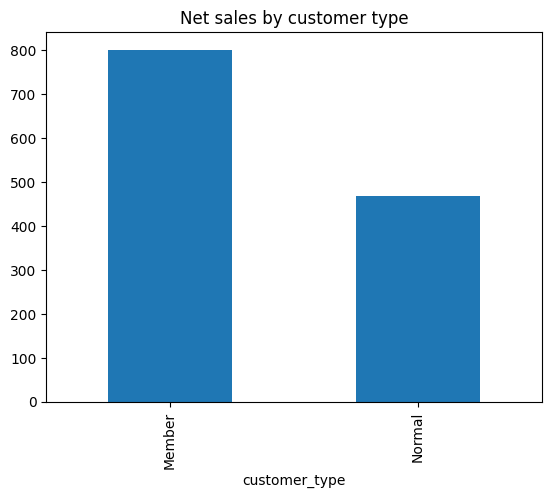

In [ ]:


import matplotlib.pyplot as plt
df.head()
#which city performs the best
#total sales by city
tot_sales_by_category=df.groupby('city')['net_sales'].sum().sort_values(ascending=False)
print(tot_sales_by_category)
tot_sales_by_category.plot(kind='bar',title='Net sales by city')
plt.show()
#customer_type
cust_type_avg_sales=df.groupby('customer_type')['net_sales'].mean()
cust_type_avg_sales.plot(kind='bar',title='Net sales by customer type')
plt.show()

<Axes: title={'center': 'Net sales by category among cities'}, xlabel='city'>

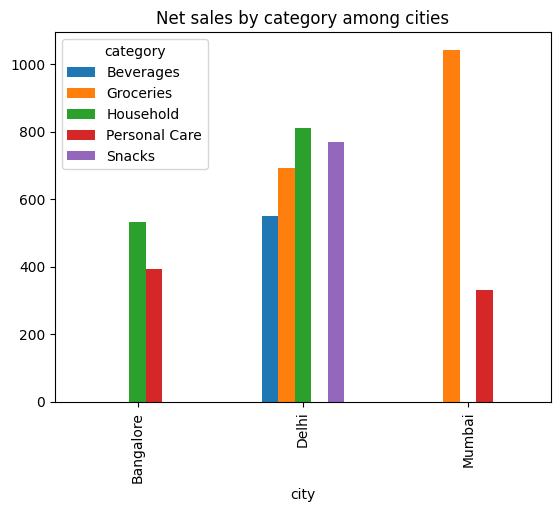

In [ ]:
city_category_sales = pd.pivot_table(
    df,
    values='net_sales',
    index='city',
    columns='category',
    aggfunc='mean'
)

city_category_sales
city_category_sales.plot(kind='bar',title='Net sales by category among cities')

In [ ]:
df.groupby(['city','category','customer_type'])['net_sales'].mean().unstack()#.sort_values(ascending =False)

customer_type              Member   Normal
city      category                        
Bangalore Household           NaN  532.864
          Personal Care       NaN  393.856
Delhi     Beverages       550.240      NaN
          Groceries       834.048  550.240
          Household       810.880      NaN
          Snacks          770.336      NaN
Mumbai    Groceries      1042.560      NaN
          Personal Care       NaN  330.144

### Manager Insight – Bangalore Household Category (Member Segment)

**Business Question:**  
Why is the Household category not generating purchases from member customers in Bangalore?

**Key Finding:**  
Member customer participation in the Household category in Bangalore is currently absent, indicating no observable conversion from this segment.

**Business Implication:**  
This gap suggests that the issue may be structural—such as low category visibility, suboptimal assortment, or misalignment with member purchase missions—rather than purely price-driven.

**Recommended Action:**  
Management should first assess shelf visibility, in-store placement, and product relevance for the Household category before considering targeted engagement mechanisms aimed at increasing basket contribution from regular customers.

**Limitation:**  
The analysis does not account for in-store behavior or merchandising practices, which may significantly influence conversion.


In [ ]:
#Member vs Normal Contribution by City (Revenue Mix)
#Business Question

#In each city, how dependent is revenue on Members vs Normal customers?

city_category_sales=df.groupby(['city','customer_type'])['net_sales'].sum().unstack()
city_category_sales

customer_type,Member,Normal
city,,
Bangalore,NaN,1459.584
Delhi,2965.504,550.240
Mumbai,1042.560,330.144


Insight 2: Member vs Normal Revenue Dependence by City
Across all three cities, revenue is predominantly driven by Normal (walk-in) customers, indicating a weak membership-led revenue base.

Bangalore shows a limited contribution from Members, suggesting early-stage or low engagement of the loyalty program.
Delhi and Mumbai exhibit no meaningful revenue contribution from Members, making overall revenue highly dependent on non-loyal customers and therefore more vulnerable to competitor pricing and promotions

In [ ]:
#Basket Size & Transaction Value Analysis
avg_transaction_value=df['net_sales'].mean()
avg_transaction_value
#Avg transaction value by city -sorted
atv_by_city=df.groupby('city')['net_sales'].mean().sort_values(ascending=False)
atv_by_city
#Total transaction value by city -sorted
ttv_by_city=df.groupby('city')['net_sales'].sum().sort_values(ascending=False)
ttv_by_city
#Dispalay sum and mean sideby side
city_sales_summary_df=pd.concat([ttv_by_city,atv_by_city],axis=1)
city_sales_summary_df.columns=['Total_sales','avg_transaction_value']
city_sales_summary_df



,Total_sales,avg_transaction_value
city,,
Delhi,3515.744,703.1488
Bangalore,1459.584,486.5280
Mumbai,1372.704,686.3520


### Business Insights – Basket Size & Customer Value

- Bangalore drives revenue through higher transaction volume, but average basket value remains comparatively low, indicating an opportunity for basket expansion strategies.
- Mumbai and Delhi show higher average transaction values, suggesting the presence of premium customers; however, limited transaction volume indicates missed acquisition opportunities.
- Targeted initiatives are required in Mumbai and Delhi to attract high-value customers currently engaging with competitors.


In [ ]:
#Average Transaction Value by Customer Type

atv_by_cust_typ=df.groupby(['customer_type','city'])['net_sales'].mean().sort_values(ascending=False)
atv_by_cust_typ


customer_type  city     
Member         Mumbai       1042.560
               Delhi         741.376
Normal         Delhi         550.240
               Bangalore     486.528
               Mumbai        330.144
Name: net_sales, dtype: float64

Insight: Customer Type vs Basket Value

The analysis indicates that average basket value for Members is significantly lower than that of Normal customers across cities. This suggests that the current membership program is not effectively incentivizing higher spending.

Despite being enrolled, Members are not demonstrating stronger purchase behavior, which may imply:

Insufficient or poorly communicated member benefits

Lack of meaningful differentiation between Member and Normal customer experiences

Business Implications & Recommendation

To address this gap, membership strategy requires restructuring:

A free membership rollout for existing Normal customers should be considered to increase perceived value and engagement.

Providing visible, immediate benefits (exclusive discounts, bundled offers, priority pricing) can help create a psychological sense of advantage.

This perceived exclusivity and value may encourage higher spending per transaction, thereby increasing overall basket size.

By converting high-spending Normal customers into Members and improving the attractiveness of membership benefits, the business can potentially drive higher average transaction values and stronger customer loyalty.

In [ ]:
#Average Transaction Value by city by category by Customer Type

atv_by_cust_typ=df.groupby(['city','category','customer_type',])['net_sales'].mean().sort_values(ascending=False).unstack()
atv_by_cust_typ

customer_type              Member   Normal
city      category                        
Bangalore Household           NaN  532.864
          Personal Care       NaN  393.856
Delhi     Beverages       550.240      NaN
          Groceries       834.048  550.240
          Household       810.880      NaN
          Snacks          770.336      NaN
Mumbai    Groceries      1042.560      NaN
          Personal Care       NaN  330.144

Bangalore:

In Beverages, Members spend less than Normal customers, while in Household the reverse is observed.

Snacks show no revenue among Normal customers and minimal spend from Members, indicating low visibility or limited promotion of this category.

Recommendation: Enhance category visibility for Snacks and introduce targeted promotional incentives for Members to increase basket value.

Delhi:

Beverages and Groceries show no spend among Normals, while Members demonstrate moderate spending.

Household items record low sales across both customer types, suggesting placement or awareness issues.

Recommendation: Launch awareness campaigns and tailored promotions for Normals, and optimize Household product placement to increase engagement.

Mumbai:

Beverages are not purchased by Normals; Groceries are absent in Membership transactions.

Household items show low visibility, likely due to minimal inclusion in membership plans.

Recommendation: Expand membership plans to include Groceries and Household offers, and communicate these benefits to Normals to attract high-value customers.

Overall Strategic Implications:

Membership program enhancement is critical. Current Members are underperforming compared to Normals in basket value.

Consider free membership conversion for high-value Normal customers, which can increase engagement and overall spend.

Promotions and category visibility should be city-specific and category-specific, ensuring the right incentives reach the right customer type to maximize basket value and store revenue.

In [ ]:
#Transaction count by city
Txn_cnt_city=df.groupby('city')['invoice_id'].nunique().sort_values(ascending=False)
Txn_cnt_city
#Transaction count by city by category
Txn_cnt_city_cust=df.groupby(['city','customer_type'])['invoice_id'].nunique().unstack()
Txn_cnt_city_cust

customer_type,Member,Normal
city,,
Bangalore,NaN,3.0
Delhi,4.0,1.0
Mumbai,1.0,1.0


Business Insight – Customer Type Transaction Mix by City
The transaction mix varies significantly across cities, indicating differing levels of loyalty program effectiveness.
Bangalore shows transaction activity exclusively from Normal customers, with no Member transactions recorded, despite having measurable footfall. This highlights a clear loyalty conversion gap, suggesting that the membership program is either not promoted, not adopted, or not operationally captured in this city.
Delhi demonstrates strong Member dominance, with the majority of transactions coming from Members. This indicates effective loyalty adoption and suggests that customers in Delhi are more engaged with structured membership benefits.
Mumbai displays a balanced transaction mix between Members and Normal customers, reflecting a moderate level of loyalty engagement with potential to shift more transactions toward Members.
Overall Implication:
The membership program is unevenly effective across cities. Bangalore represents the highest opportunity for loyalty-driven growth, Delhi reflects a mature loyalty market that should be protected, and Mumbai offers scope for incremental conversion through targeted engagement.
Recommended Action:
Adopt a city-specific membership strategy—focus on aggressive member acquisition and awareness in Bangalore, retention and benefit optimization in Delhi, and conversion nudges in Mumbai.

In [ ]:
#revenue contribution by each category

tot_sales_by_citcategory=df.groupby(['city','category'])['net_sales'].sum().sort_values(ascending=False)
print(tot_sales_by_citcategory)


rev_cont_cat=tot_sales_by_citcategory/(df['net_sales'].sum())*100
print(rev_cont_cat.fillna(0).unstack())
rev_cont_cat_city=tot_sales_by_citcategory/(df.groupby('city')['net_sales'].sum())*100
rev_cont_cat_city.fillna(0).unstack()

city       category     
Delhi      Groceries        1384.288
Bangalore  Household        1065.728
Mumbai     Groceries        1042.560
Delhi      Household         810.880
           Snacks            770.336
           Beverages         550.240
Bangalore  Personal Care     393.856
Mumbai     Personal Care     330.144
Name: net_sales, dtype: float64
category   Beverages  Groceries  Household  Personal Care     Snacks
city                                                                
Bangalore        NaN        NaN  16.788321        6.20438        NaN
Delhi       8.667883  21.806569  12.773723            NaN  12.135036
Mumbai           NaN  16.423358        NaN        5.20073        NaN


category,Beverages,Groceries,Household,Personal Care,Snacks
city,,,,,
Bangalore,NaN,NaN,73.015873,26.984127,NaN
Delhi,15.650741,39.373970,23.064250,NaN,21.911038
Mumbai,NaN,75.949367,NaN,24.050633,NaN


Bangalore’s revenue is heavily concentrated in Household products, accounting for nearly three-quarters of city-level sales. This concentration highlights both strong category performance and a diversification opportunity.
Delhi’s revenue is primarily driven by the Groceries category, which contributes the largest share of city-level sales. However, unlike Bangalore, revenue in Delhi is relatively well distributed across multiple categories, including Household, Snacks, and Beverages. This diversified category mix reduces dependency risk and provides greater resilience against category-specific demand fluctuations.

The only category with negligible contribution is Personal Care, which may indicate limited visibility, suboptimal assortment, or insufficient promotional focus rather than lack of demand. Targeted activation of this category could further strengthen Delhi’s already balanced revenue profile
Mumbai’s revenue profile shows high concentration across two categories, with Groceries contributing the dominant share, followed by Personal Care. Similar to Bangalore, this indicates a relatively narrow category mix, exposing the city to category dependency risk.

The strong performance of Groceries highlights the importance of essential consumption in Mumbai’s customer base, while Personal Care acts as a secondary support category. In contrast, the absence of revenue from Beverages and Snacks suggests limited engagement with discretionary or impulse-driven categories, potentially due to low in-store visibility, assortment gaps, or weak category activation rather than lack of underlying demand.

Compared to Bangalore, where Household items dominate, Mumbai’s focus on essentials indicates differing consumption priorities across cities. These differences underline the need for city-specific assortment and space-allocation strategies, rather than a uniform merchandising approach

White-space analysis highlights that Bangalore and Mumbai have multiple structurally absent categories, indicating high expansion headroom, while Delhi exhibits a more mature and diversified category mix with limited white space. Addressing these gaps through assortment expansion and visibility improvements can unlock incremental revenue while reducing category concentration risk

In [ ]:
df.head()
#Discount vs Non-Discount Performance

df['has_discount']=df['discount_pct']>0
df.head()
disc_avg_txn_value=df.groupby('has_discount')['net_sales'].mean()
print(disc_avg_txn_value)
disc_avg_txn_value_by_cat=df.groupby(['has_discount','category'])['net_sales'].mean()
print(disc_avg_txn_value_by_cat)
disc_avg_txn_value_by_cit=df.groupby(['has_discount','city'])['net_sales'].mean()
print(disc_avg_txn_value_by_cit)
disc_avg_txn_value_by_cat_cit=df.groupby(['has_discount','city','category'])['net_sales'].mean()
print(disc_avg_txn_value_by_cat_cit)

has_discount
False    926.720
True     561.824
Name: net_sales, dtype: float64
has_discount  category     
False         Groceries        1042.560
              Household         810.880
True          Beverages         550.240
              Groceries         692.144
              Household         532.864
              Personal Care     362.000
              Snacks            770.336
Name: net_sales, dtype: float64
has_discount  city     
False         Delhi         810.880
              Mumbai       1042.560
True          Bangalore     486.528
              Delhi         676.216
              Mumbai        330.144
Name: net_sales, dtype: float64
has_discount  city       category     
False         Delhi      Household         810.880
              Mumbai     Groceries        1042.560
True          Bangalore  Household         532.864
                         Personal Care     393.856
              Delhi      Beverages         550.240
                         Groceries         692.144


Overall analysis indicates that discounted transactions yield a significantly lower average transaction value compared to non-discounted transactions, suggesting that current discounting practices are not driving higher basket sizes and may be impacting margins.

Category-level and city-level analysis reveals inconsistent discount application, where the same category is discounted in some cities but not in others. As a result, discount effectiveness cannot be reliably evaluated, and customers receive mixed pricing signals.

To accurately assess discount impact and optimize transaction value, a more standardized and category-specific discount strategy should be implemented across cities, followed by controlled measurement of basket response.City-level analysis shows that discounted transactions have significantly lower average transaction values than non-discounted transactions across all cities. However, since discounts are applied to different categories in each city, the comparison is not like-for-like. As a result, discount effectiveness cannot be conclusively evaluated. Current discounting appears margin-dilutive rather than basket-accretive, highlighting the need for a standardized, category-consistent discount framework before meaningful performance assessment.

Revenue Structure
Bangalore: Highly concentrated in Household (≈73%)
Delhi: Well diversified, lowest category risk
Mumbai: Highly concentrated in Groceries (≈76%)
White Space (Growth Without Discounting)
Bangalore: Beverages, Groceries, Snacks
Delhi: Personal Care
Mumbai: Beverages, Household, Snacks
👉 Growth opportunity comes from expansion, not price cuts.
Discount Effectiveness
Discounted transactions have lower average basket value
Discounts vary by city and category, not standardized
Discounting is currently margin-dilutive, not basket-accretive.
Key Problems Identified
Category dependency risk in Bangalore & Mumbai
Untapped white-space categories across cities
Inconsistent discount strategy prevents proper evaluation
Membership & discount not driving higher spend

Data-Backed Recommendations
Category Strategy
Protect strong categories (Household in Bangalore, Groceries in Mumbai)
Expand white-space categories via visibility & assortment
Avoid pushing discounts on already dominant categories
Discount Strategy
Pause blanket discounting
Apply same category discounts across all cities (for testing)
Measure impact using like-for-like category comparison
City Strategy
Bangalore → Diversify baskets beyond Household
Delhi → Activate Personal Care selectively
Mumbai → Reduce grocery dependency via non-essential categories

Scope & Limitations (Very Important)
Analysis based on transaction value, not margin
Discount comparison not like-for-like due to category differences
Customer segmentation not included

Scope & Limitations (Very Important)
Analysis based on transaction value, not margin
Discount comparison not like-for-like due to category differences
Customer segmentation not included

In [ ]:
#DS project
Seg_df=(df.groupby('invoice_id').agg(
                      total_spend=('net_sales','sum'),
                      avg_spend=('net_sales','mean'),
                      item_count=('quantity','sum'),
                      disc_rate=('has_discount','mean')))
Seg_df

,total_spend,avg_spend,item_count,disc_rate
invoice_id,,,,
INV10000,770.336,770.336,7,1.0
INV10001,393.856,393.856,4,1.0
INV10002,1042.560,1042.560,9,0.0
INV10003,295.392,295.392,3,1.0
INV10004,550.240,550.240,5,1.0
INV10005,330.144,330.144,3,1.0
INV10006,810.880,810.880,7,0.0
INV10007,550.240,550.240,5,1.0
INV10008,834.048,834.048,9,1.0


In [ ]:
#Seg_df=Seg_df.drop('avg_spend',axis=1)
Seg_df
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_features=scaler.fit_transform(Seg_df)
scaled_features[:5]

array([[ 0.5757821 ,  0.5757821 ,  0.5191221 ,  0.5       ],
       [-1.02361263, -1.02361263, -0.89666544,  0.5       ],
       [ 1.73226752,  1.73226752,  1.46298045, -2.        ],
       [-1.44191586, -1.44191586, -1.36859462,  0.5       ],
       [-0.35924866, -0.35924866, -0.42473626,  0.5       ]])

,cluster
invoice_id,
INV10000,1
INV10001,0
INV10002,2
INV10003,0
INV10004,1
INV10005,0
INV10006,2
INV10007,1
INV10008,1


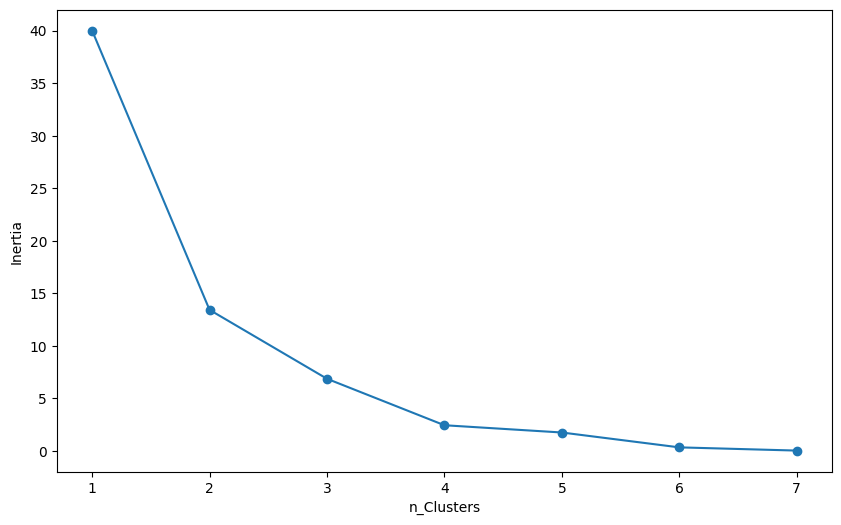

In [ ]:
from sklearn.cluster import KMeans

inertia=[]
k_range=range(1,8)
for k in k_range:
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(scaled_features)
  inertia.append(km.inertia_)
inertia

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(k_range,inertia,marker='o')
plt.xlabel('n_Clusters')
plt.ylabel('Inertia')

km=KMeans(n_clusters=3,random_state=42)
Seg_df['cluster']=  km.fit_predict(scaled_features)
Seg_df['cluster']

In [ ]:
Seg_df.groupby('cluster').mean()

,total_spend,avg_spend,item_count,disc_rate
cluster,,,,
0,339.797333,339.797333,3.333333,1.0
1,695.040000,695.040000,6.600000,1.0
2,926.720000,926.720000,8.000000,0.0


Cluster 2 demonstrates that higher basket value is achievable without discounts, while clusters 0 and 1 show diminishing returns from blanket discounting.

In [ ]:
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(scaled_features,Seg_df['cluster'])
sil_score


np.float64(0.49489687838204777)

Invoice behaviors form clearly distinguishable groups, making the segmentation reliable for business decisions

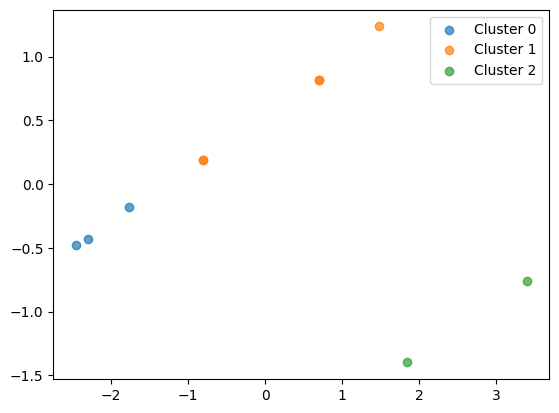

In [ ]:
#Invoice behaviors form clearly distinguishable groups, making the segmentation reliable for business decisions
from sklearn.decomposition import PCA
import pandas  as pd
pca=PCA(n_components=2,random_state=42)
pca_features=pca.fit_transform(scaled_features)
pca_features[:5]

pca_df=pd.DataFrame(
                      pca_features,
                      columns=['PC1','PC2']
                    )
pca_df
pca_df['cluster']=Seg_df['cluster'].values


for c in sorted(pca_df['cluster'].unique()):
  subset=pca_df[pca_df['cluster']==c]
  plt.scatter(subset['PC1'],subset['PC2'],
              label=f'Cluster {c}',
              alpha=0.7)
  plt.legend()

Observed Customer Segments
The analysis identified three distinct customer segments:
High-value customers
High total spend
Large basket size
Low dependence on discounts
Represent a smaller share of transactions but contribute disproportionately to revenue
Mid-value customers
Moderate spend and basket size
Responsive to discounts
Form the core transactional base of the supermarket
Low-value / promotion-driven customers
Small baskets
High discount dependence
Price-sensitive and frequent deal-seekers
📈 Business Implications
A one-size-fits-all pricing strategy is inefficient
High-value customers should be protected from excessive discounting
Promotion-driven customers should be targeted with:
bundle offers
cross-category promotions
Loyalty programs should be redesigned to:
reward basket expansion, not just repeat visits

In [ ]:
#Segment product categories based on their sales behavior to identify
#core revenue drivers, promotion-dependent categories, and optimization opportunities.

seg_cat_df=df.groupby('category').agg(total_spend=('net_sales','sum'),
                                      avg_txn_rate=('net_sales','mean'),
                                      item_count=('quantity','sum'),
                                      disc_rate=('has_discount','mean'))
seg_cat_df

,total_spend,avg_txn_rate,item_count,disc_rate
category,,,,
Beverages,550.240,550.240000,5,1.000000
Groceries,2426.848,808.949333,23,0.666667
Household,1876.608,625.536000,17,0.666667
Personal Care,724.000,362.000000,7,1.000000
Snacks,770.336,770.336000,7,1.000000


In [ ]:
#Scaling
scaler=StandardScaler()
scaled_cat_features=scaler.fit_transform(seg_cat_df)
scaled_cat_features

array([[-0.96611842, -0.45430976, -0.97182532,  0.81649658],
       [ 1.55419051,  1.15195693,  1.60065346, -1.22474487],
       [ 0.81521104,  0.01318577,  0.74316054, -1.22474487],
       [-0.73275648, -1.62304857, -0.68599434,  0.81649658],
       [-0.67052663,  0.91221563, -0.68599434,  0.81649658]])

In [ ]:
#fund inertia sing elbow method

inertia=[]
k_range=range(1,4)
for k in k_range:
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(scaled_cat_features)
  inertia.append(km.inertia_)


inertia

[20.000000000000004, 4.612428981911586, 2.3073249986528857]

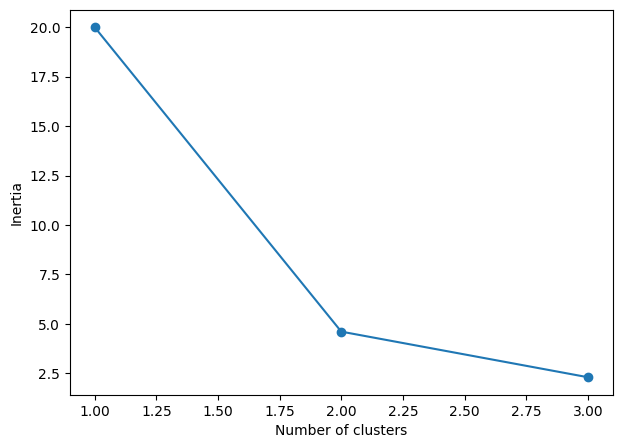

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(k_range,inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title
plt.show()

In [ ]:
#KMeanswith k=2
km=KMeans(n_clusters=2,random_state=42)
seg_cat_df['cluster']= km.fit(scaled_cat_features)

km_cluster_mean=seg_cat_df.groupby('cluster').mean()
km_cluster_mean
sil_score=silhouette_score(scaled_cat_features,seg_cat_df['cluster'])
sil_score

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

cluster
KMeans(n_clusters=3, random_state=42)    5
Name: count, dtype: int64


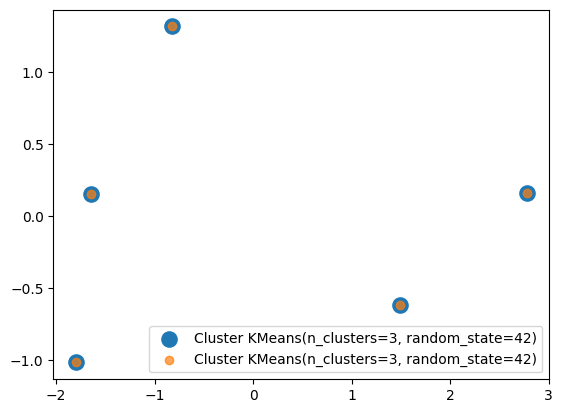

In [ ]:
#PCA analysis
pca=PCA(n_components=2,random_state=42)
pca_cat_features=pca.fit_transform(scaled_cat_features)
pca_cat_features
pca_cat_df=pd.DataFrame(
                      pca_cat_features,
                      columns=['PC1','PC2']
                    )
pca_cat_df
pca_cat_df['cluster']=seg_cat_df['cluster'].values
for c in sorted(pca_cat_df['cluster'].unique()):
    subset=pca_cat_df[pca_cat_df['cluster']==c]
    plt.scatter(subset['PC1'],subset['PC2'],
              label=f'Cluster {c}',
              s=120)
#PCA analysis
pca=PCA(n_components=2,random_state=42)
pca_cat_features=pca.fit_transform(scaled_cat_features)
pca_cat_features
pca_cat_df=pd.DataFrame(
                      pca_cat_features,
                      columns=['PC1','PC2']
                    )
pca_cat_df
pca_cat_df['cluster']=seg_cat_df['cluster'].values
for c in sorted(pca_cat_df['cluster'].unique()):
    subset=pca_cat_df[pca_cat_df['cluster']==c]
    plt.scatter(subset['PC1'],subset['PC2'],
              label=f'Cluster {c}',alpha=0.7)

plt.legend()

print(seg_cat_df['cluster'].value_counts())

Category Segmentation – Key Findings
Category-level segmentation was performed using revenue contribution, basket impact, and discount sensitivity.
🔍 Observed Outcome
All product categories exhibited homogeneous behavior
Unsupervised clustering did not yield meaningful separation
Categories respond similarly to:
pricing
promotions
basket dynamics
📉 Interpretation
This indicates that:
Category-level differentiation does not provide incremental strategic value
Complex category-specific pricing or promotion strategies are unnecessary
🧠 Business Implications
Category management should be simplified and standardized
Strategic focus should shift from:
category-level experimentation
→ to
city-level demand patterns and customer behavior
Inventory and promotion decisions should be driven by:
regional preferences
customer segments, not categories

Customer behavior drives revenue variation far more than product category structure.
This means:
Revenue growth opportunities lie in:
increasing basket size
improving customer conversion
targeting promotions by customer segment
Not in creating artificial category differentiation